In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data = pd.read_csv('cleaned_googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [3]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [4]:
ent = data[data.Category == 'ENTERTAINMENT']
ent.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
855,Netflix,ENTERTAINMENT,4.4,5456208,Varies with device,100000000,Free,0.0,Teen,Entertainment,2018-07-31,Varies with device,Varies with device
856,Complete Spanish Movies,ENTERTAINMENT,4.0,11656,4.5M,1000000,Free,0.0,Everyone,Entertainment,2018-01-20,1.02,4.0.3 and up
857,Pluto TV - It’s Free TV,ENTERTAINMENT,4.2,28948,Varies with device,1000000,Free,0.0,Teen,Entertainment,2018-08-04,Varies with device,Varies with device
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,4.3,296771,11M,10000000,Free,0.0,Teen,Entertainment,2018-07-15,2.13.5,4.1 and up
859,YouTube Kids,ENTERTAINMENT,4.5,470089,Varies with device,50000000,Free,0.0,Everyone,Entertainment;Music & Video,2018-08-03,3.43.3,4.1 and up


In [5]:
len(ent)

149

In [6]:
ent = ent.drop(['Category','Rating','Reviews','Size','Content Rating','Genres','Last Updated','Current Ver','Android Ver'], axis=1)
ent.head()

,App,Installs,Type,Price
855,Netflix,100000000,Free,0.0
856,Complete Spanish Movies,1000000,Free,0.0
857,Pluto TV - It’s Free TV,1000000,Free,0.0
858,Tubi TV - Free Movies & TV,10000000,Free,0.0
859,YouTube Kids,50000000,Free,0.0


In [7]:
len(ent[ent.Type == 'Free'])

147

In [ ]:
#???????????? not enough data?

In [22]:
ent.App.is_unique

False

In [24]:
#checking duplicates
dups = ent[ent.App.duplicated(keep=False)]
dups.sort_values('App')

,App,Installs,Type,Price
920,A&E - Watch Full Episodes of TV Shows,1000000,Free,0.0
977,A&E - Watch Full Episodes of TV Shows,1000000,Free,0.0
946,A&E - Watch Full Episodes of TV Shows,1000000,Free,0.0
922,BET NOW - Watch Shows,1000000,Free,0.0
983,BET NOW - Watch Shows,1000000,Free,0.0
...,...,...,...,...
978,VH1,1000000,Free,0.0
947,VH1,1000000,Free,0.0
878,Viki: Asian TV Dramas & Movies,10000000,Free,0.0
988,Viki: Asian TV Dramas & Movies,10000000,Free,0.0


In [25]:
drop_me = ent[ent.App.duplicated(keep='last')]
drop_me.index

Int64Index([855, 858, 878, 883, 888, 898, 899, 903, 904, 905, 910, 912, 913,
            914, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927,
            929, 931, 932, 933, 934, 935, 937, 938, 939, 940, 943, 944, 946,
            947, 949, 950, 951, 956, 957, 963, 971],
           dtype='int64')

In [26]:
#dropping duplicates
ent = ent.drop(drop_me.index)
ent.App.is_unique

True

In [28]:
len(ent)

102

In [29]:
len(ent[ent.Type == 'Free'])

100

In [30]:
#... not enough data? if out of 102, only 2 have a price............
#I mean, off the bat, it isn't going to have any correlation

#frequency
type_unique = ent.Type.unique()

temp_dict = {}
for i in range(len(type_unique)):
    temp_row = {type_unique[i]:[len(ent[ent.Type == type_unique[i]])]}
    temp_dict.update(temp_row)

df = pd.DataFrame(temp_dict)  
df = df.melt()
df.columns = ['Type', 'Frequency']
df = df.sort_values(by='Type', ascending=True)
df = df.reset_index(drop=True)

df.to_csv('paid_vs_free.csv', sep=',', index=False)

df

,Type,Frequency
0,Free,100
1,Paid,2


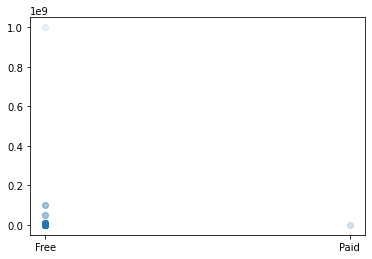

In [31]:
plt.scatter(ent.Type, ent.Installs, alpha=.1)

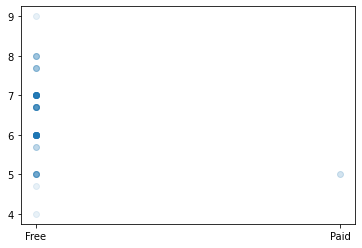

In [32]:
plt.scatter(ent.Type, np.log10(ent.Installs), alpha=.1)

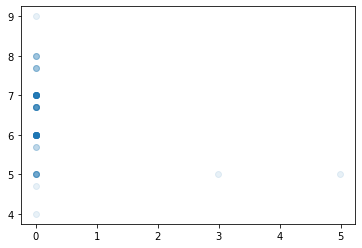

In [33]:
plt.scatter(ent.Price, np.log10(ent.Installs), alpha=.1)

<AxesSubplot:>

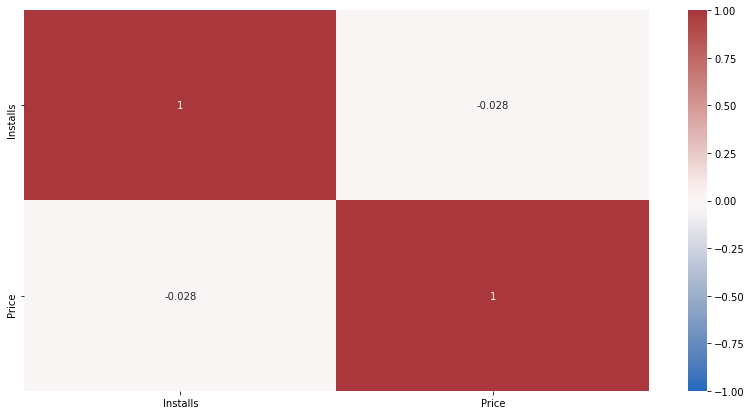

In [34]:
f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(ent.corr(), ax=ax, vmin=-1, cmap="vlag", annot=True)